In [102]:
import heapq
import matplotlib.pyplot as plt
jatim = {}

In [103]:
class PriorityQueue:
    def __init__(self) -> None:
        self.cities = []

    def isEmpty(self):
        if self.cities == []:
            return True
        return False

    def check(self):
        print(self.cities)

    def push(self, city, cost):
        heapq.heappush(self.cities, (cost, city))
    
    def pop(self):
        return heapq.heappop(self.cities)[1]

In [104]:
class CityNode:
  def __init__(self, city, distance) -> None:
    self.city = str(city)
    self.distance = str(distance)

In [105]:
def makeDict():
    file = open("distance.txt", 'r')
    for str in file:
        delimeter = str.split(',')
        #print(delimeter) # add this line
        city1 = delimeter[0]
        city2 = delimeter[1]
        dist = delimeter[2]
        jatim.setdefault(city1, []).append(CityNode(city2, dist))
        jatim.setdefault(city2, []).append(CityNode(city1, dist))

In [106]:
def makeHeuristicDict():
    h = {}
    file = open("heuristic.txt", 'r')
    for str in file:
        delimeter = str.strip().split(',')
        node = delimeter[0].strip()
        sld  = int(delimeter[1].strip()) # Jalan lurus
        h[node] = sld
    return h

def heuristic(node, values):
    node = node.strip()
    return values[node] 

In [107]:
city_coords = {
    "Magetan": (150, 25),
    "Ngawi": (230, 40),
    "Madiun": (140, 50),
    "Ponorogo": (80, 45),
    "Bojonegoro": (210, 75),
    "Nganjuk": (130, 80),
    "Lamongan": (240, 120),
    "Jombang": (155, 125),
    "Gresik": (230, 130),
    "Surabaya": (220, 160),
    "Bangkalan": (250, 170),
    "Sampang": (260, 210),
    "Pamekasan": (230, 220),
    "Sumenep": (240, 245),
    "Sidoarjo": (190, 170),
    "Probolinggo": (135, 200),
    "Situbondo": (155, 240)
}

def aStar(start, end):
    path = {}
    distance = {}
    q = PriorityQueue()
    h = makeHeuristicDict()

    q.push(start, 0)
    distance[start] = 0
    path[start] = None
    expandList = []

    while q.isEmpty() == False:
        curr = q.pop()
        expandList.append(curr)
        print(curr)

        if curr == end:
            break

        for new in jatim[curr]:
            graph_cost = distance[curr] + int(new.distance)
            #print(new.city, new.distance, "now : " + str(distance[curr]), graph_cost)

            if new.city not in distance or graph_cost < distance[new.city]:
                distance[new.city] = graph_cost
                f_cost = graph_cost + heuristic(new.city, h)
                q.push(new.city, f_cost)
                path[new.city] = curr
    
    printOutput(start, end, path, distance, expandList, city_coords, jatim)


def printOutput(start, end, path, distance, expandList, city_coords, jatim):
    finalpath = []
    i = end

    while (path.get(i) != None):
        finalpath.append(i)
        i = path[i]
    finalpath.append(start)
    finalpath.reverse()

    print(path)
    print("Membuat Program A* Sederhana")
    print("Magetan -> Surabaya\n")
    print("Kota yang mungkin dikunjungi \t\t: " + str(expandList))
    print("Jumlah kemungkinan kota \t\t: " + str(len(expandList)))
    print("\n")
    print("Kota yg dilewati dengan jarak terpendek\t: " + str(finalpath))
    print("Jumlah kota yang dilewati \t\t: " + str(len(finalpath)))
    print("Total Jarak yang ditempuh \t\t: " + str(distance[end]))

    graph = {}
    for city, nodes in jatim.items():
        graph[city] = [(n.city, int(n.distance)) for n in nodes]

    astar = finalpath

    for i, j in city_coords.items():
        plt.plot(j[1], j[0], "ro")
        plt.annotate(i, (j[1] + 0.2, j[0]))

        for k in graph[i]:
            n = city_coords[k[0]]
            plt.plot([j[1], n[1]], [j[0], n[0]], "gray")

    for i in range(len(astar)):
        try:
            first = city_coords[astar[i]]
            second = city_coords[astar[i + 1]]
            plt.plot([first[1], second[1]], [first[0], second[0]], "blue")
        except:
            continue

    plt.errorbar(1, 1, label="GBFS", color="green")
    plt.errorbar(1, 1, label="ASTAR", color="blue")
    plt.legend(loc="lower left")

    plt.show()

Surabaya
Gresik
Sidoarjo
Lamongan
Jombang
Bojonegoro
Nganjuk
Probolinggo
Nganjuk
Bangkalan
Sampang
Pamekasan
Ngawi
Madiun
Madiun
Ponorogo
Magetan
{'Surabaya': None, 'Gresik': 'Surabaya', 'Jombang': 'Surabaya', 'Bangkalan': 'Surabaya', 'Sidoarjo': 'Surabaya', 'Lamongan': 'Gresik', 'Probolinggo': 'Sidoarjo', 'Bojonegoro': 'Lamongan', 'Nganjuk': 'Bojonegoro', 'Ngawi': 'Bojonegoro', 'Madiun': 'Ngawi', 'Situbondo': 'Probolinggo', 'Sampang': 'Bangkalan', 'Pamekasan': 'Sampang', 'Sumenep': 'Pamekasan', 'Magetan': 'Ngawi', 'Ponorogo': 'Madiun'}
Membuat Program A* Sederhana
Magetan -> Surabaya

Kota yang mungkin dikunjungi 		: ['Surabaya', 'Gresik', 'Sidoarjo', 'Lamongan', 'Jombang', 'Bojonegoro', 'Nganjuk', 'Probolinggo', 'Nganjuk', 'Bangkalan', 'Sampang', 'Pamekasan', 'Ngawi', 'Madiun', 'Madiun', 'Ponorogo', 'Magetan']
Jumlah kemungkinan kota 		: 17


Kota yg dilewati dengan jarak terpendek	: ['Surabaya', 'Gresik', 'Lamongan', 'Bojonegoro', 'Ngawi', 'Magetan']
Jumlah kota yang dilewati 		: 6


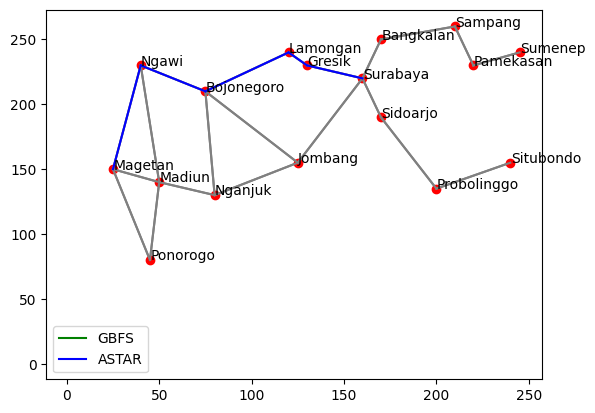

In [108]:
def main():
    src = "Surabaya"
    dst = "Magetan"
    makeDict()
    aStar(src, dst)

if __name__ == "__main__":
    main()